# Social Generations and Their Meaning

In this schema, we define social generations — not as familial or biological lineages, but as birth cohorts who share cultural, historical, and social experiences during their formative years. The term refers to groups of people born around the same time who are exposed to similar events, technologies, values, and public discourse, thereby forming a collective identity. [Wikipedia](https://en.wikipedia.org/wiki/Generation#Social_generation)

The idea of social generations emerged in the 19th century in tandem with modernization, industrialization, and mass media, as societies increasingly perceived youth and age cohorts as meaningful units of change. 

The distinction from genealogical “generations” is crucial: social generations emphasize shared historical location and sociocultural imprints rather than strictly chronological succession. 
Wikipedia

Karl Mannheim further formalized this perspective in The Problem of Generations, arguing that a generation gains identity if its members not only are born in the same era, but experience the same impactful events at similar life stages.  Modern generational theory often follows the imprint hypothesis — that significant historical or cultural events leave deep psychological and social marks on youth that distinguish one generation from another. 
Wikipedia

In practice, this lookup table anchors well-known Western social generations (starting from the the Lost Generation and ending with Gen Alpha) by birth-year ranges and key attributes (characteristic, archetype, life principle, symbol). These labels are heuristic devices rather than rigid prescriptions — used to help interpret trends in values, behaviors, and generational dynamics across time.

In [1]:
%xmode minimal
import datajoint as dj

Exception reporting mode: Minimal


In [2]:
schema = dj.Schema('generations')

[2025-10-10 22:33:09,673][INFO]: DataJoint 0.14.6 connected to dev@db:3306


In [3]:
@schema
class Generation(dj.Lookup):
    definition = """
    generation: varchar(16)
    ---
    dob_start: date
    dob_end: date
    characteristic: varchar(255)
    archetype: varchar(16)
    life_principle: varchar(255)
    symbol: varchar(64)
    """

    contents = [
        (
            'Lost Generation',
            '1883-01-01', '1900-12-31',
            'Disillusioned by World War I; sought meaning through art, modernism, and expatriate life.',
            'Nomad',
            'Search for authenticity and self-expression amid disillusionment.',
            'The Great Gatsby',
        ),
        (
            'Greatest',
            '1901-01-01', '1927-12-31',
            'Grew up through the Great Depression and World War II; defined by duty and sacrifice.',
            'Hero',
            'Duty, unity, and collective purpose.',
            'Rosie the Riveter',
        ),
        (
            'Silent',
            '1928-01-01', '1945-12-31',
            'Conformist yet hardworking; valued stability, discipline, and civic responsibility.',
            'Artist',
            'Discipline, craftsmanship, and harmony.',
            'Grey Flannel Suit',
        ),
        (
            'Baby Boomers',
            '1946-01-01', '1964-12-31',
            'Prosperous postwar generation; shaped modern culture, civil rights, and consumerism.',
            'Prophet',
            'Purpose, moral vision, and self-expression.',
            'Woodstock Dove',
        ),
        (
            'Gen X',
            '1965-01-01', '1980-12-31',
            'Independent and skeptical; adapted to globalization and the digital revolution.',
            'Nomad',
            'Self-reliance, adaptability, and realism.',
            'MTV Logo',
        ),
        (
            'Gen Y',
            '1981-01-01', '1996-12-31',
            'Millennials; tech-savvy, idealistic, collaborative, and shaped by the internet age.',
            'Hero',
            'Collaboration, inclusion, and empowerment.',
            'iPhone',
        ),
        (
            'Gen Z',
            '1997-01-01', '2012-12-31',
            'Digital natives; diverse, socially conscious, and fluent in online culture.',
            'Artist',
            'Authenticity, empathy, and self-identity.',
            'TikTok Logo',
        ),
        (
            'Gen Alpha',
            '2013-01-01', '2025-12-31',
            'Born into AI and automation; hyper-connected and globally aware from birth.',
            'Prophet',
            'Innovation, stewardship, and global vision.',
            'AI Assistant',
        ),
    ]


In [4]:
Generation()

generation,dob_start,dob_end,characteristic,archetype,life_principle,symbol
Baby Boomers,1946-01-01,1964-12-31,"Prosperous postwar generation; shaped modern culture, civil rights, and consumerism.",Prophet,"Purpose, moral vision, and self-expression.",Woodstock Dove
Gen Alpha,2013-01-01,2025-12-31,Born into AI and automation; hyper-connected and globally aware from birth.,Prophet,"Innovation, stewardship, and global vision.",AI Assistant
Gen X,1965-01-01,1980-12-31,Independent and skeptical; adapted to globalization and the digital revolution.,Nomad,"Self-reliance, adaptability, and realism.",MTV Logo
Gen Y,1981-01-01,1996-12-31,"Millennials; tech-savvy, idealistic, collaborative, and shaped by the internet age.",Hero,"Collaboration, inclusion, and empowerment.",iPhone
Gen Z,1997-01-01,2012-12-31,"Digital natives; diverse, socially conscious, and fluent in online culture.",Artist,"Authenticity, empathy, and self-identity.",TikTok Logo
Greatest,1901-01-01,1927-12-31,Grew up through the Great Depression and World War II; defined by duty and sacrifice.,Hero,"Duty, unity, and collective purpose.",Rosie the Riveter
Lost Generation,1883-01-01,1900-12-31,"Disillusioned by World War I; sought meaning through art, modernism, and expatriate life.",Nomad,Search for authenticity and self-expression amid disillusionment.,The Great Gatsby
Silent,1928-01-01,1945-12-31,"Conformist yet hardworking; valued stability, discipline, and civic responsibility.",Artist,"Discipline, craftsmanship, and harmony.",Grey Flannel Suit


## Populate Person table


In [5]:
from faker import Faker
fake = Faker()

@schema
class Person(dj.Manual):
    definition = """
    person: varchar(12)
    ---
    sex: enum('M','F')
    name: varchar(120)
    dob: date
    """

Person.insert([i,
               *(("M", fake.name_male()) if fake.random_int(0, 1)
                 else ("F", fake.name_female())),
               fake.date_of_birth(minimum_age=1, maximum_age=120)]
              for i in range(1000, 2000)
              )

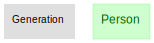

In [6]:
dj.Diagram(schema)

# Query 

Sort persons into generations based on their birth date

In [7]:
(Person * Generation & 'dob between dob_start and dob_end').proj('name', 'sex', 'dob', 'generation')

person,generation,sex,name,dob
1000,Gen X,M,James Suarez,1975-10-21
1001,Gen Y,F,Deborah Hernandez,1983-05-23
1002,Baby Boomers,M,Russell Butler,1950-11-20
1003,Greatest,M,Curtis Atkins,1912-03-23
1004,Greatest,M,Jason Butler,1918-10-04
1005,Baby Boomers,F,Erica Horton,1958-10-28
1006,Gen Alpha,M,John Richards,2021-06-02
1007,Gen Z,M,Michael Bell,1999-09-13
1008,Gen Z,M,Mark Davis,2002-05-22
1009,Baby Boomers,F,Gail Whitehead,1948-01-18
